In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and 
# longitudes into the coordinates list before moving on.

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

# Import the requests library. (6.2)
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7aaedeac7434dbeebbf811a6cffe63ca


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

        # Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jinka
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | syamzha
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | sulangan
Processing Record 11 of Set 1 | olavarria
Processing Record 12 of Set 1 | prado
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | sorland
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | pasighat
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 21 of Set 1 | kap

Processing Record 38 of Set 4 | carupano
Processing Record 39 of Set 4 | sept-iles
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | hovd
Processing Record 42 of Set 4 | chitral
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | mitchell
Processing Record 45 of Set 4 | camocim
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | gat
Processing Record 48 of Set 4 | boddam
Processing Record 49 of Set 4 | cookshire
City not found. Skipping...
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | del rio
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | standerton
Processing Record 4 of Set 5 | parana
Processing Record 5 of Set 5 | kjopsvik
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | shache
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | lazaro cardenas
Processing Record 10 of Set 5 | orlik
Processing Record 11 of 

Processing Record 29 of Set 8 | narasannapeta
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | krasnoye
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | samusu
City not found. Skipping...
Processing Record 34 of Set 8 | neckargemund
Processing Record 35 of Set 8 | burnie
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | imeni poliny osipenko
Processing Record 38 of Set 8 | sampit
Processing Record 39 of Set 8 | thanh hoa
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | miraflores
Processing Record 42 of Set 8 | kichmengskiy gorodok
Processing Record 43 of Set 8 | bhinmal
Processing Record 44 of Set 8 | vaitape
Processing Record 45 of Set 8 | ovalle
Processing Record 46 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 8 | sao felix do xingu
Processing Record 48 of Set 8 | paso de los toros
Processing Record 49 of Set 8 | bowen
Processing Record 50 of Se

Processing Record 17 of Set 12 | sioux lookout
Processing Record 18 of Set 12 | ola
Processing Record 19 of Set 12 | chapais
Processing Record 20 of Set 12 | coihaique
Processing Record 21 of Set 12 | bartica
Processing Record 22 of Set 12 | guider
Processing Record 23 of Set 12 | tubruq
City not found. Skipping...
Processing Record 24 of Set 12 | hammerfest
Processing Record 25 of Set 12 | blagoveshchensk
Processing Record 26 of Set 12 | adrar
Processing Record 27 of Set 12 | qui nhon
Processing Record 28 of Set 12 | berlevag
Processing Record 29 of Set 12 | batsfjord
Processing Record 30 of Set 12 | malibu
Processing Record 31 of Set 12 | dargaville
Processing Record 32 of Set 12 | wellington
Processing Record 33 of Set 12 | cap-aux-meules
Processing Record 34 of Set 12 | baiyin
Processing Record 35 of Set 12 | turukhansk
Processing Record 36 of Set 12 | esna
Processing Record 37 of Set 12 | aflu
City not found. Skipping...
Processing Record 38 of Set 12 | luba
Processing Record 39 o

In [9]:
len(city_data)

571

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jinka,5.6500,36.6500,62.04,90,100,2.73,ET,2022-04-30 20:07:47
1,Albany,42.6001,-73.9662,64.44,26,89,3.00,US,2022-04-30 19:58:03
2,Leningradskiy,69.3833,178.4167,9.64,91,71,4.41,RU,2022-04-30 20:06:05
3,Bluff,-46.6000,168.3333,64.80,66,100,14.05,NZ,2022-04-30 20:00:23
4,Hermanus,-34.4187,19.2345,58.93,86,79,3.00,ZA,2022-04-30 20:07:48
5,Cape Town,-33.9258,18.4232,60.91,79,0,4.61,ZA,2022-04-30 19:57:50
6,Syamzha,60.0158,41.0614,25.21,89,59,4.74,RU,2022-04-30 20:07:48
7,Sulangan,11.1373,123.7228,81.57,78,100,11.97,PH,2022-04-30 20:07:49
8,Olavarria,-36.8927,-60.3225,52.02,56,0,7.72,AR,2022-04-30 20:07:49
9,Prado,-17.3411,-39.2208,75.87,81,32,7.27,BR,2022-04-30 20:07:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jinka,ET,2022-04-30 20:07:47,5.6500,36.6500,62.04,90,100,2.73
1,Albany,US,2022-04-30 19:58:03,42.6001,-73.9662,64.44,26,89,3.00
2,Leningradskiy,RU,2022-04-30 20:06:05,69.3833,178.4167,9.64,91,71,4.41
3,Bluff,NZ,2022-04-30 20:00:23,-46.6000,168.3333,64.80,66,100,14.05
4,Hermanus,ZA,2022-04-30 20:07:48,-34.4187,19.2345,58.93,86,79,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1651352403.1833706

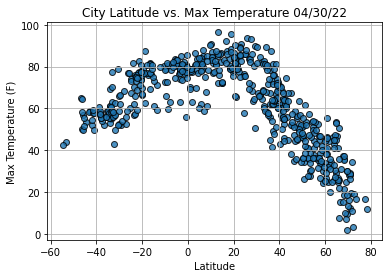

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

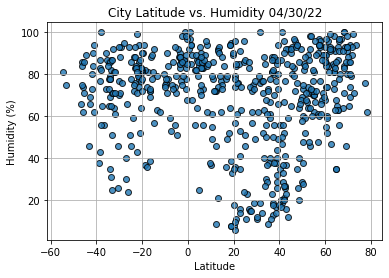

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

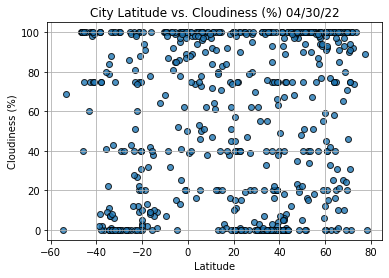

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

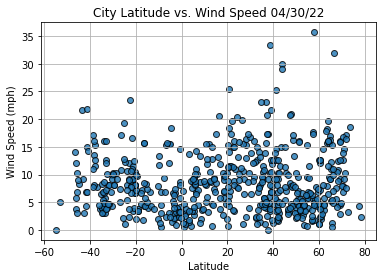

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2022-04-30 19:59:10
Lat                        62.456
Lng                     -114.3525
Max Temp                    34.32
Humidity                       47
Cloudiness                      0
Wind Speed                   5.75
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
566     True
567    False
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jinka,ET,2022-04-30 20:07:47,5.6500,36.6500,62.04,90,100,2.73
1,Albany,US,2022-04-30 19:58:03,42.6001,-73.9662,64.44,26,89,3.00
2,Leningradskiy,RU,2022-04-30 20:06:05,69.3833,178.4167,9.64,91,71,4.41
6,Syamzha,RU,2022-04-30 20:07:48,60.0158,41.0614,25.21,89,59,4.74
7,Sulangan,PH,2022-04-30 20:07:49,11.1373,123.7228,81.57,78,100,11.97


In [28]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

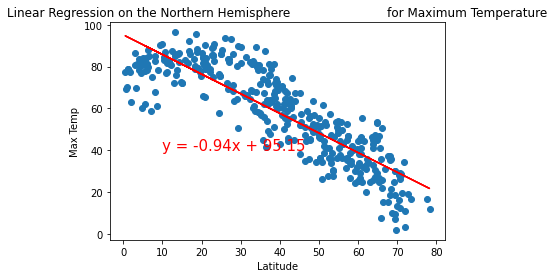

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

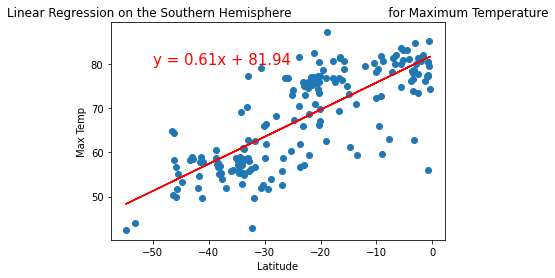

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

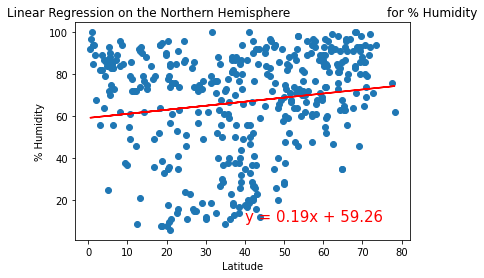

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

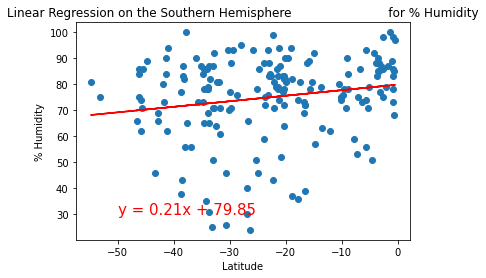

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

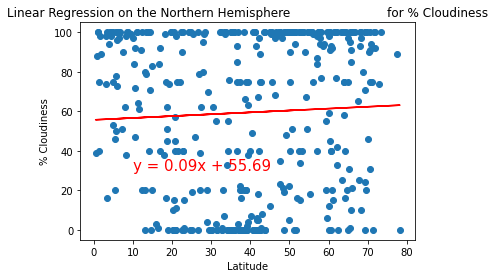

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,30))

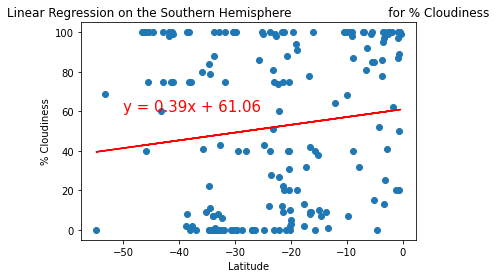

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

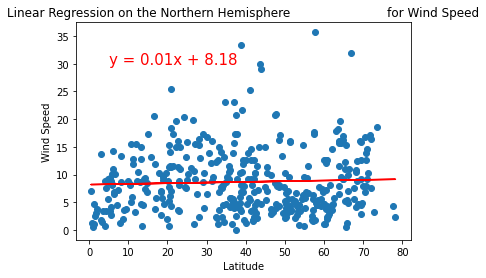

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,30))

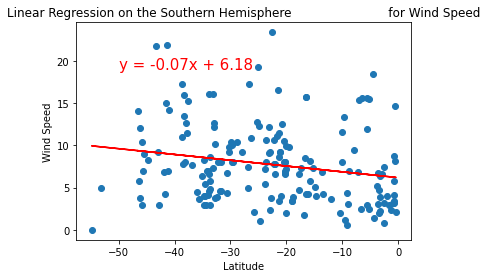

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,19))